In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [2]:
import pandas as pd
import math
import random
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
path = 'train.csv'

data = pd.read_csv(path)

test_path = 'test.csv'

test = pd.read_csv(test_path)

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data.shape

(8693, 14)

In [7]:
transported = {False: 0, True: 1}
data.Transported = [transported[item] for item in data.Transported]

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

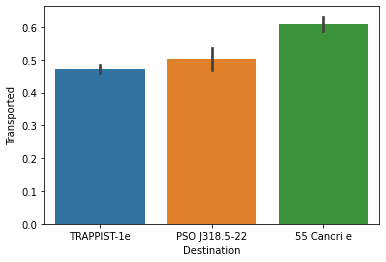

In [8]:
sns.barplot(data['Destination'], data['Transported'])

In [9]:
data.groupby(['Destination']).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Destination,,,,,,,
55 Cancri e,29.305776,192.818746,888.091889,157.700342,480.395230,508.556250,0.610000
PSO J318.5-22,27.529412,90.601290,122.187179,113.285347,118.001282,140.132653,0.503769
TRAPPIST-1e,28.817522,252.950752,375.916077,187.463309,283.981865,267.792250,0.471175


In [10]:
# change vip column to 0 or 1 then fill nans with False
vip = {False: 0, True: 1}
data['VIP'].fillna(False, inplace=True)
data.VIP = [vip[item] for item in data.VIP]


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

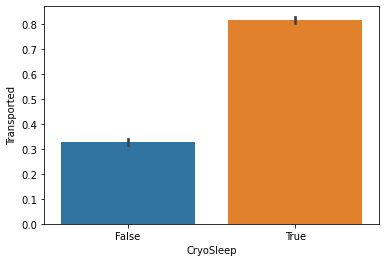

In [11]:
sns.barplot(data['CryoSleep'], data['Transported'])

## CryoSleep seems to be very important so we 
## will try to accurately guess the remaining nans

In [12]:
data['CryoSleep'].isnull().sum()

217

In [13]:
data['HomePlanet'].isnull().sum()

201

In [14]:
data.groupby(['HomePlanet']).mean()


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,,
Earth,26.068232,0.000000,136.940209,137.228857,133.872606,142.781701,138.132933,0.423946
Europa,34.419664,0.061473,145.231981,1503.212950,151.132820,848.055609,875.765998,0.658846
Mars,29.297203,0.035816,552.897272,54.361999,308.445734,110.221706,47.440698,0.523024


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

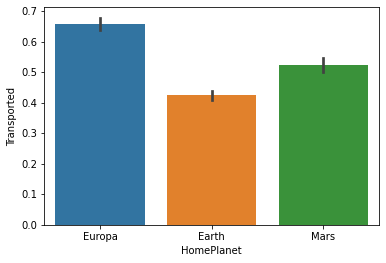

In [15]:
sns.barplot(data['HomePlanet'], data['Transported'])

In [16]:
# here we will fill the nans
# will fill age with the mean age and then fill the spending ones with zero
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)


data['RoomService'].fillna(0, inplace=True)
data['FoodCourt'].fillna(0, inplace=True)
data['ShoppingMall'].fillna(0, inplace=True)
data['Spa'].fillna(0, inplace=True)
data['VRDeck'].fillna(0, inplace=True)
data['Spent'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

In [17]:
# it seems some home planets can be guessed by people with the same last name
# here we will create a new column for last names
last = []
first = []
names = data['Name'].values

for name in names:
    if type(name) == str:
        last.append(name.split()[1])
        first.append(name.split()[0])
    else:
        last.append('')
        first.append('')
data['Last'] = last
data['First'] = first


In [18]:
# here we will check the home planet column for nans
# if a row with a nan has other people with the same last name in it
# we will fill the home planet with the home planet of people with the same last name
for i in range(0,len(data)):
    if type(data.at[i,'HomePlanet']) == float:
        last = data.at[i,'Last']
        if len(data[data['Last'] == last]) > 1:
            planet = list(set(data[data['Last'] == last]['HomePlanet'].values).difference({np.nan}))[0]
            data.at[i,'HomePlanet'] = planet
        else:
            pass
    else:
        pass

In [19]:
# here we will do the same thing but with first names

for i in range(0,len(data)):
    if type(data.at[i,'HomePlanet']) == float:
        first = data.at[i,'First']
        if len(data[data['First'] == first]) > 1:
            planet = list(set(data[data['First'] == first]['HomePlanet'].values).difference({np.nan}))[0]
            data.at[i,'HomePlanet'] = planet
        else:
            pass
    else:
        pass
    
# now all of the HomePlanet nans are filled with what seems to be the correct planet

In [20]:
data['HomePlanet'].isnull().sum()

0

## it seems that everyone in the top 25% of spending
## does not use cryosleep. So we will fill all of the top 
## spenders with False for CryoSleep

In [21]:
for i in range(0,len(data)):
    if data.at[i,'Spent'] > 1250 and type(data.at[i,'CryoSleep'] == float):
        data.at[i,'CryoSleep'] = False

## Roughly 1/3 people has cryosleep but there doesn't seem to be a good way to tell which people would have it so we will just randomly assign 1/3 of the Nans to be true and the rest to be false

In [22]:
for i in range(0,len(data)):
    if type(data.at[i,'CryoSleep']) != bool:
        rand = random.randint(1,3)
        if rand == 1:
            data.at[i,'CryoSleep'] = True
        else:
            data.at[i,'CryoSleep'] = False
    else:
        pass
    

In [23]:
data.CryoSleep.value_counts()

False    5608
True     3085
Name: CryoSleep, dtype: int64

In [24]:
2865/(2865+5828)

0.3295755205337628

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

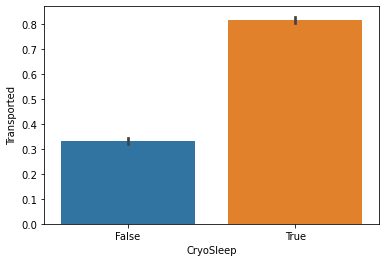

In [25]:
sns.barplot(data['CryoSleep'], data['Transported'])

In [26]:
cryo = {False: 0, True: 1}
data.CryoSleep = [cryo[item] for item in data.CryoSleep]

In [27]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Spent,Last,First
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,Ofracculy,Maham
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,Vines,Juanna
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,Susent,Altark
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,Susent,Solam
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,Santantines,Willy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,Noxnuther,Gravior
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,Mondalley,Kurta
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,Connon,Fayey
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,Hontichre,Celeon


In [28]:
deck = []
side = []
for item in data['Cabin'].values:
    if type(item) != float:
        deck.append(item[0])
        side.append(item[len(item)-1])
    else:
        deck.append('')
        side.append('')

In [29]:
data['Deck'] = deck
data['Side'] = side

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Side', ylabel='Transported'>

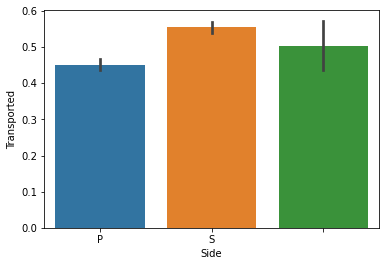

In [30]:
sns.barplot(data['Side'], data['Transported'])

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deck', ylabel='Transported'>

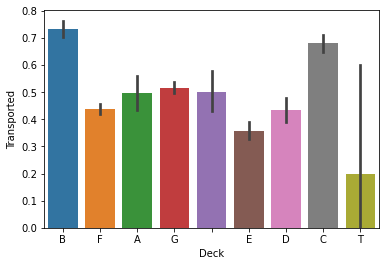

In [31]:
sns.barplot(data['Deck'], data['Transported'])

In [32]:
data['Cabin'].isnull().sum()

199

In [33]:
data['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
      199
T       5
Name: Deck, dtype: int64

## It looks like the deck could be a good indicator for survival but side not so much. It also looks like we can do the same trick that we did for the home planet. It's not 100% accurate as their are some people with the same last name that are on different decks but for the most part the families stick together

In [34]:
for i in range(0,len(data)):
    if data.at[i,'Deck'] == '':
        last = data.at[i,'Last']
        if len(data[data['Last'] == last]) > 1:
            deck = list(set(data[data['Last'] == last]['Deck'].values).difference({np.nan,''}))[0]
            data.at[i,'Deck'] = deck
        else:
            pass
    else:
        pass

In [35]:
data['Deck'].value_counts()

F    2878
G    2569
E     893
B     812
C     765
D     505
A     257
        9
T       5
Name: Deck, dtype: int64

In [36]:
# we're just gonna fill the rest of the nans with F because fuck it
for i in range(0,len(data)):
    if data.at[i,'Deck'] == '':
        data.at[i,'Deck'] = 'F'

### Now we need to encode the Deck data. We will use an ordinal encoder but we will leave this comment here to remind us that we may want to try a different method

In [37]:
dic = {"A":1, "B":2, "C":3,"D":3,"E":4,"F":5,"G":6,"T":7}
data['Deck'] = data['Deck'].replace(dic)

hp_dic = {"Earth":1, "Europa":2, "Mars":3}
data['HomePlanet'] = data['HomePlanet'].replace(hp_dic)

In [38]:
data


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Spent,Last,First,Deck,Side
0,0001_01,2,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,Ofracculy,Maham,2,P
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,Vines,Juanna,5,S
2,0003_01,2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,Susent,Altark,1,S
3,0003_02,2,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,Susent,Solam,1,S
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,Santantines,Willy,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,Noxnuther,Gravior,1,P
8689,9278_01,1,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,Mondalley,Kurta,6,S
8690,9279_01,1,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,Connon,Fayey,6,S
8691,9280_01,2,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,Hontichre,Celeon,4,S


### I think we're about ready to start the training. We'll leave this comment here to remind ourselves that we may want to use the side data as well and maybe to not include age or spent data. We may also not want to use VIP.

In [39]:
feature_cols = ['HomePlanet','CryoSleep','Age','VIP','Spent','Deck']
target_col = ['Transported']

In [40]:
X = data[feature_cols]
y = data[target_col]

In [41]:
X


,HomePlanet,CryoSleep,Age,VIP,Spent,Deck
0,2,0,39.0,0,0.0,2
1,1,0,24.0,0,736.0,5
2,2,0,58.0,1,10383.0,1
3,2,0,33.0,0,5176.0,1
4,1,0,16.0,0,1091.0,5
...,...,...,...,...,...,...
8688,2,0,41.0,1,8536.0,1
8689,1,1,18.0,0,0.0,6
8690,1,0,26.0,0,1873.0,6
8691,2,0,32.0,0,4637.0,4


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=4)

In [43]:
# we will now scale the age data (and maybe the spending data) since that should help us out
# problably should have done this a bit ago

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.Age = scaler.fit_transform(X_train.Age.values.reshape(-1,1))
X_test.Age = scaler.transform(X_test.Age.values.reshape(-1,1))

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [45]:
clf = RandomForestClassifier(max_depth=14, random_state=0)

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


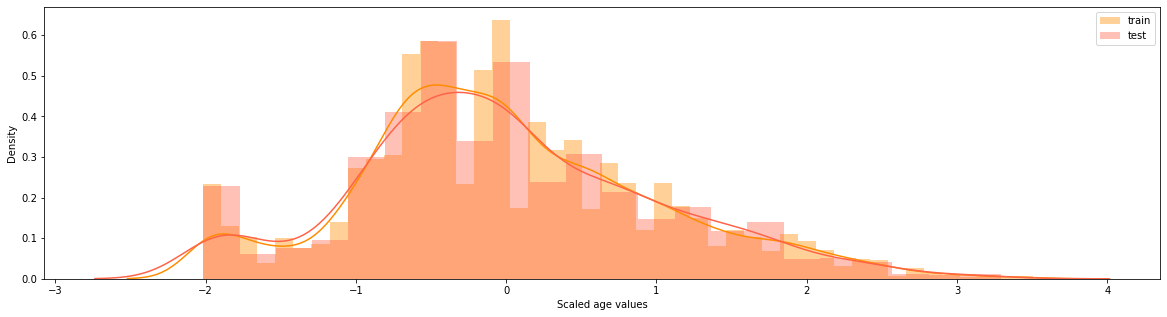

In [46]:
plt.figure(figsize=(20,5))
sns.distplot(X_train.Age.values, label="train", color="darkorange")
sns.distplot(X_test.Age.values, label="test", color="tomato");
plt.xlabel("Scaled age values");
plt.ylabel("Density")
plt.legend();

In [47]:
clf.fit(X_train,y_train)

/tmp/ipykernel_206901/993133242.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=14, random_state=0)

In [48]:
y_pred = clf.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7315950920245399

In [50]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [140]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [141]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [142]:
test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [350]:
# fill nans for spending, age
mean_age_test = test['Age'].mean()
test['Age'].fillna(mean_age_test, inplace=True)


test['RoomService'].fillna(0, inplace=True)
test['FoodCourt'].fillna(0, inplace=True)
test['ShoppingMall'].fillna(0, inplace=True)
test['Spa'].fillna(0, inplace=True)
test['VRDeck'].fillna(0, inplace=True)
test['Spent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

In [351]:
test.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Spent             0
Last              0
First             0
Deck              0
Side              0
dtype: int64

In [352]:
vip = {False: 0, True: 1}
test['VIP'].fillna(False, inplace=True)
test.VIP = [vip[item] for item in test.VIP]

In [354]:
# once again the rich people aren't using the Cryo sleep so we will fill those with false
for i in range(0,len(test)):
    if test.at[i,'Spent'] > 1445 and type(test.at[i,'CryoSleep'] == float):
        test.at[i,'CryoSleep'] = False

In [355]:
test.CryoSleep.value_counts()

False    2708
1        1569
Name: CryoSleep, dtype: int64

In [356]:
for i in range(0,len(test)):
    if type(test.at[i,'CryoSleep']) != bool:
        rand = random.randint(1,3)
        if rand == 1:
            test.at[i,'CryoSleep'] = True
        else:
            test.at[i,'CryoSleep'] = False
    else:
        pass

In [357]:
test.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Spent             0
Last              0
First             0
Deck              0
Side              0
dtype: int64

In [358]:
# it seems some home planets can be guessed by people with the same last name
# here we will create a new column for last names
last = []
first = []
names = test['Name'].values

for name in names:
    if type(name) == str:
        last.append(name.split()[1])
        first.append(name.split()[0])
    else:
        last.append('')
        first.append('')
test['Last'] = last

test['First'] = first

In [359]:
for i in range(0,len(test)):
    if type(test.at[i,'HomePlanet']) == float:
        last = test.at[i,'Last']
        if len(test[test['Last'] == last]) > 1:
            if len(list(set(test[test['Last'] == last]['HomePlanet'].values).difference({np.nan}))) > 0:
                planet = list(set(test[test['Last'] == last]['HomePlanet'].values).difference({np.nan}))[0]
                test.at[i,'HomePlanet'] = planet
            else:
                planet = 'Mars'
                test.at[i,'HomePlanet'] = planet
        else:
            pass
    else:
        pass

In [360]:
for i in range(0,len(test)):
    if type(test.at[i,'HomePlanet']) == float:
        first = test.at[i,'First']
        if len(test[test['First'] == first]) > 1:
            planet = list(set(test[test['First'] == first]['HomePlanet'].values).difference({np.nan}))[0]
            test.at[i,'HomePlanet'] = planet
        else:
            pass
    else:
        pass

In [361]:
test.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Spent             0
Last              0
First             0
Deck              0
Side              0
dtype: int64

In [362]:
test[test['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Spent,Last,First,Deck,Side


In [363]:
# there are four nans left at the end. We will just fill them by what their names sound like
test.at[1890,'HomePlanet'] = 'Mars'
test.at[2043,'HomePlanet'] = 'Europa'
test.at[2419,'HomePlanet'] = 'Mars'
test.at[3530,'HomePlanet'] = 'Earth'

In [364]:
deck = []
side = []
for item in test['Cabin'].values:
    if type(item) != float:
        deck.append(item[0])
        side.append(item[len(item)-1])
    else:
        deck.append('')
        side.append('')

In [365]:
test['Deck'] = deck
test['Side'] = side

In [366]:
for i in range(0,len(test)):
    if test.at[i,'Deck'] == '':
        last = test.at[i,'Last']
        if len(test[test['Last'] == last]) > 1:
            deck = list(set(test[test['Last'] == last]['Deck'].values).difference({np.nan,''}))[0]
            test.at[i,'Deck'] = deck
        else:
            pass
    else:
        pass

In [367]:
# again we will just fill the rest of the nans with F
for i in range(0,len(test)):
    if test.at[i,'Deck'] == '':
        test.at[i,'Deck'] = 'F'

In [368]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Spent,Last,First,Deck,Side
0,0013_01,1,True,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,Carsoning,Nelly,G,S
1,0018_01,1,False,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,Peckers,Lerome,F,S
2,0019_01,2,False,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,Unhearfus,Sabih,C,S
3,0021_01,2,False,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,Caltilter,Meratz,C,S
4,0023_01,1,False,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,Harperez,Brence,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,False,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,Peter,Jeron,G,S
4273,9269_01,1,False,NaN,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0,Scheron,Matty,G,
4274,9271_01,3,False,D/296/P,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,Pore,Jayrin,D,P
4275,9273_01,2,False,D/297/P,NaN,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0,Conale,Kitakan,D,P


In [369]:
dic = {"A":1, "B":2, "C":3,"D":3,"E":4,"F":5,"G":6,"T":7}
test['Deck'] = test['Deck'].replace(dic)

hp_dic = {"Earth":1, "Europa":2, "Mars":3}
test['HomePlanet'] = test['HomePlanet'].replace(hp_dic)

In [370]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Spent,Last,First,Deck,Side
0,0013_01,1,True,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,Carsoning,Nelly,6,S
1,0018_01,1,False,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,Peckers,Lerome,5,S
2,0019_01,2,False,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,Unhearfus,Sabih,3,S
3,0021_01,2,False,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,Caltilter,Meratz,3,S
4,0023_01,1,False,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,Harperez,Brence,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,False,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,Peter,Jeron,6,S
4273,9269_01,1,False,NaN,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0,Scheron,Matty,6,
4274,9271_01,3,False,D/296/P,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,Pore,Jayrin,3,P
4275,9273_01,2,False,D/297/P,NaN,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0,Conale,Kitakan,3,P


In [371]:
cryo = {False: 0, True: 1}
test.CryoSleep = [cryo[item] for item in test.CryoSleep]

In [372]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Spent,Last,First,Deck,Side
0,0013_01,1,1,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,Carsoning,Nelly,6,S
1,0018_01,1,0,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,Peckers,Lerome,5,S
2,0019_01,2,0,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,Unhearfus,Sabih,3,S
3,0021_01,2,0,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,Caltilter,Meratz,3,S
4,0023_01,1,0,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,Harperez,Brence,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,Peter,Jeron,6,S
4273,9269_01,1,0,NaN,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0,Scheron,Matty,6,
4274,9271_01,3,0,D/296/P,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,Pore,Jayrin,3,P
4275,9273_01,2,0,D/297/P,NaN,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0,Conale,Kitakan,3,P


In [382]:
feature_cols = ['HomePlanet','CryoSleep','Age','VIP','Spent','Deck']
X_test = test[feature_cols]

In [383]:
X_test

,HomePlanet,CryoSleep,Age,VIP,Spent,Deck
0,1,1,27.000000,0,0.0,6
1,1,0,19.000000,0,2832.0,5
2,2,0,31.000000,0,0.0,3
3,2,0,38.000000,0,7418.0,3
4,1,0,20.000000,0,645.0,5
...,...,...,...,...,...,...
4272,1,0,34.000000,0,0.0,6
4273,1,0,42.000000,0,1018.0,6
4274,3,0,28.658146,0,0.0,3
4275,2,0,28.658146,0,3203.0,3


In [376]:
clf2 = RandomForestClassifier(max_depth=14, random_state=0)


In [377]:
clf2.fit(X, y)

/tmp/ipykernel_207290/359040036.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X, y)


RandomForestClassifier(max_depth=14, random_state=0)

In [378]:
X


,HomePlanet,CryoSleep,Age,VIP,Spent,Deck
0,2,0,39.0,0,0.0,2
1,1,0,24.0,0,736.0,5
2,2,0,58.0,1,10383.0,1
3,2,0,33.0,0,5176.0,1
4,1,0,16.0,0,1091.0,5
...,...,...,...,...,...,...
8688,2,0,41.0,1,8536.0,1
8689,1,1,18.0,0,0.0,6
8690,1,0,26.0,0,1873.0,6
8691,2,0,32.0,0,4637.0,4


In [379]:
submission = pd.DataFrame(columns=['PassengerId', 'Transported'])

In [380]:
submission['PassengerId'] = test['PassengerId']

In [381]:
submission

,PassengerId,Transported
0,0013_01,NaN
1,0018_01,NaN
2,0019_01,NaN
3,0021_01,NaN
4,0023_01,NaN
...,...,...
4272,9266_02,NaN
4273,9269_01,NaN
4274,9271_01,NaN
4275,9273_01,NaN


In [385]:
len(clf2.predict(X_test))

4277

In [386]:
submission['Transported'] = clf2.predict(X_test)

In [387]:
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,0
4275,9273_01,1


In [388]:
dic = {0: False, 1:True}
submission.Transported = [dic[item] for item in submission.Transported]

In [389]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,False
4275,9273_01,True


In [390]:
submission.set_index("PassengerId")

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,False


In [394]:
submission.to_csv('submission.csv',index=False)